## Data description

In [1]:
## Imports
from datasets import load_from_disk, Dataset
import numpy as np
import pandas as pd
import pyarrow as pa
from pylab import *
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_dir = "/work3/s174498/concept_random_dataset/"

### 1: "Base case: Twitter data"

In [3]:
## Load "Tweet"-dataset

# emoji
ds_emoji_train = pd.DataFrame(load_from_disk(data_dir + 'tweet_emoji/train'))
ds_emoji_test = pd.DataFrame(load_from_disk(data_dir + 'tweet_emoji/test'))

# stance datasets
ds_climate_train = load_from_disk(data_dir + 'tweet_stance_climate/train')
ds_abortion_train = load_from_disk(data_dir + 'tweet_stance_abortion/train')
ds_feminist_train = load_from_disk(data_dir + 'tweet_stance_feminist/train')
ds_hillary_train = load_from_disk(data_dir + 'tweet_stance_hillary/train')
ds_atheism_train = load_from_disk(data_dir + 'tweet_stance_atheism/train')

# emotion
ds_emotion_train = load_from_disk(data_dir + 'tweet_emotion/train')
ds_emotion_test = load_from_disk(data_dir + 'tweet_emotion/test')

# hate
ds_hate_train = load_from_disk(data_dir + 'tweet_hate/train')
ds_hate_test = load_from_disk(data_dir + 'tweet_hate/test')

# irony
ds_irony_train = load_from_disk(data_dir + 'tweet_irony/train')
ds_irony_test = load_from_disk(data_dir + 'tweet_irony/test')

# offensive
ds_offensive_train = load_from_disk(data_dir + 'tweet_offensive/train')
ds_offensive_test = load_from_disk(data_dir + 'tweet_offensive/test')

Sentences from the emoji-datasets (train and test) are "merged" into longer sentences. 

In [4]:
unique_train = ds_emoji_train['label'].unique()
unique_train.sort()
unique_train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
unique_test = ds_emoji_test['label'].unique()
unique_test.sort()
unique_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [6]:
new_sentences = []
remaining_sentences = []

for i in range(len(unique_train)):

    # making boolean series for a team name
    filter_train = ds_emoji_train["label"]==unique_train[i]
    filter_test = ds_emoji_test["label"]==unique_test[i]

    # filtering data
    df_filter_train = ds_emoji_train.where(filter_train)
    df_filter_test = ds_emoji_test.where(filter_test)

    df_new1 = df_filter_train[~df_filter_train.isnull().any(axis=1)]
    df_new2 = df_filter_test[~df_filter_test.isnull().any(axis=1)]

    print(len(df_new1))
    print(len(df_new2))

    length_min = min(len(df_new1), len(df_new2))
    length_max = max(len(df_new1), len(df_new2))

    for j in range(0, length_min):
        new_sentences.append(df_new1.iloc[j]['text']+df_new2.iloc[j]['text'])
    print('length of new_sentences', len(new_sentences))

    # save the remaining sentences
    if(length_max == len(df_new1)):
        df_remain = df_new1
    else:
        df_remain = df_new2

    for h in range(length_min+1, length_max):
        remaining_sentences.append(df_remain.iloc[h]['text'])
    print('length of remaining_sentences', len(remaining_sentences))

9204
10798
length of new_sentences 9204
length of remaining_sentences 1593
4901
4830
length of new_sentences 14034
length of remaining_sentences 1663
4713
4534
length of new_sentences 18568
length of remaining_sentences 1841
2043
2605
length of new_sentences 20611
length of remaining_sentences 2402
2146
3716
length of new_sentences 22757
length of remaining_sentences 3971
2132
1613
length of new_sentences 24370
length of remaining_sentences 4489
2078
1996
length of new_sentences 26366
length of remaining_sentences 4570
2345
2749
length of new_sentences 28711
length of remaining_sentences 4973
1287
1549
length of new_sentences 29998
length of remaining_sentences 5234
1391
1175
length of new_sentences 31173
length of remaining_sentences 5449
1982
1432
length of new_sentences 32605
length of remaining_sentences 5998
946
1949
length of new_sentences 33551
length of remaining_sentences 7000
1246
1265
length of new_sentences 34797
length of remaining_sentences 7018
980
1114
length of new_sen

Concatenate all lists

In [7]:
emoji_sentences = new_sentences + remaining_sentences

In [8]:
stance_sentences = ds_climate_train['text'] + ds_abortion_train['text'] + ds_feminist_train['text'] + ds_hillary_train['text'] + ds_atheism_train['text']

In [9]:
emotion_sentences = ds_emotion_train['text'] + ds_emotion_test['text']

Filter 'non-hate', 'non-irony' and 'non-offensive' from both train and test datasets

In [10]:
df_label_hate = pd.DataFrame(ds_hate_train['label'])
idx_nonhate = df_label_hate[df_label_hate[0] == 0].index.values

df_label_irony = pd.DataFrame(ds_irony_train['label'])
idx_nonirony = df_label_irony[df_label_irony[0] == 0].index.values

df_label_offensive = pd.DataFrame(ds_offensive_train['label'])
idx_nonoffensive = df_label_offensive[df_label_offensive[0] == 0].index.values

nonconcepts_train = ds_hate_train[idx_nonhate]['text']+ ds_irony_train[idx_nonirony]['text'] + ds_offensive_train[idx_nonoffensive]['text']

In [11]:
df_label_hate = pd.DataFrame(ds_hate_test['label'])
idx_nonhate = df_label_hate[df_label_hate[0] == 0].index.values

df_label_irony = pd.DataFrame(ds_irony_test['label'])
idx_nonirony = df_label_irony[df_label_irony[0] == 0].index.values

df_label_offensive = pd.DataFrame(ds_offensive_test['label'])
idx_nonoffensive = df_label_offensive[df_label_offensive[0] == 0].index.values

nonconcepts_test = ds_hate_test[idx_nonhate]['text']+ ds_irony_test[idx_nonirony]['text'] + ds_offensive_test[idx_nonoffensive]['text']

Again, concat lists

In [12]:
nonconcepts_sentences = nonconcepts_train + nonconcepts_test

In [13]:
concat_sentences = emoji_sentences + stance_sentences + emotion_sentences + nonconcepts_sentences

Count the number of words in sentences

In [14]:
df_random = pd.DataFrame({'Sentences': concat_sentences})

word_in_sentence = []
for i in range(len(df_random['Sentences'])):
    word_in_sentence.append(len(df_random['Sentences'][i].split()))

df_random['words in sentences'] = word_in_sentence

Making sure that all sentences are not too long

In [15]:
df_random = df_random[df_random['words in sentences'] < 45]

In [16]:
# df_random_data = pd.DataFrame({'title': 'random', 'text_list': list(df_random['Sentences'])})
# data_random = Dataset(pa.Table.from_pandas(df_random_data))

# save data
# data_random.save_to_disk('/work3/s174498/concept_random_dataset/tweet_random')

Filter only 'hate', 'irony' and offensive' sentences to create our concept data. Afterwards, count words in sentences

In [18]:
df_label_hate = pd.DataFrame(ds_hate_test['label'])
idx_hate = df_label_hate[df_label_hate[0] == 1].index.values
df_hate = pd.DataFrame({'Sentences': ds_hate_test[idx_hate]['text']})

word_in_sentence = []
for i in range(len(df_hate['Sentences'])):
    word_in_sentence.append(len(df_hate['Sentences'][i].split()))

df_hate['words in sentences'] = word_in_sentence

In [19]:
df_label_irony= pd.DataFrame(ds_irony_test['label'])
idx_irony = df_label_irony[df_label_irony[0] == 1].index.values
df_irony = pd.DataFrame({'Sentences': ds_irony_test[idx_irony]['text']})

word_in_sentence = []
for i in range(len(df_irony['Sentences'])):
    word_in_sentence.append(len(df_irony['Sentences'][i].split()))

df_irony['words in sentences'] = word_in_sentence

In [20]:
df_label_offensive = pd.DataFrame(ds_offensive_test['label'])
idx_offensive = df_label_offensive[df_label_offensive[0] == 1].index.values
df_offensive = pd.DataFrame({'Sentences': ds_offensive_test[idx_offensive]['text']})

word_in_sentence = []
for i in range(len(df_offensive['Sentences'])):
    word_in_sentence.append(len(df_offensive['Sentences'][i].split()))

df_offensive['words in sentences'] = word_in_sentence

In [46]:
import warnings
warnings.filterwarnings("ignore")

NameError: name 'df_random' is not defined

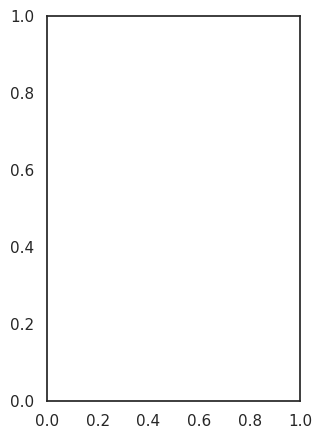

In [17]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.set_style("white")
plt.legend(labels=['random', 'hate', 'irony', 'offensive'])

subplot(1,4,1)
ax = sns.distplot(df_random['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Set2")[-1])
ax.axvline(x=df_random['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('random')
ax.set(ylabel='Count')
ax.set(xlabel=' ')

subplot(1,4,2)
ax = sns.distplot(df_hate['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Paired")[9])
ax.axvline(x=df_hate['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('hate')
ax.set(xlabel=' ')

subplot(1,4,3)
ax = sns.distplot(df_irony['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[7])
ax.axvline(x=df_irony['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('irony')
ax.set(xlabel=' ')

subplot(1,4,4)
ax = sns.distplot(df_offensive['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[2])
ax.axvline(x=df_offensive['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('offensive')
ax.legend(labels=['mean'], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel=' ')

fig=ax.figure
fig.text(0.5,0.01, "Number of words in each sentence", ha="center", va="center")
plt.show()

In [49]:
from transformers import RobertaTokenizer
tokenizer_pretrained = RobertaTokenizer.from_pretrained('roberta-base')

Compute number of tokens per sentence in the datasets

In [99]:
tokens_random = []
for i in list(df_random['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_random['Sentences'][i]))
    tokens_random.append(numb_tokens)

tokens_hate = []
for i in list(df_hate['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_hate['Sentences'][i]))
    tokens_hate.append(numb_tokens)

tokens_irony = []
for i in list(df_irony['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_irony['Sentences'][i]))
    tokens_irony.append(numb_tokens)

tokens_offensive = []
for i in list(df_offensive['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_offensive['Sentences'][i]))
    tokens_offensive.append(numb_tokens)

Create table of stats

In [110]:
list_dataset = ['random', 'hate', 'irony', 'offensive']
list_mean_words = [round(np.mean(df_random['words in sentences']),1), round(np.mean(df_hate['words in sentences']),1), round(np.mean(df_irony['words in sentences']),1), round(np.mean(df_offensive['words in sentences']),1)]
list_mean_tokens = [round(np.mean(tokens_random),1), round(np.mean(tokens_hate),1), round(np.mean(tokens_irony),1), round(np.mean(tokens_offensive),1)]
list_sentences = [len(df_random), len(df_hate), len(df_irony), len(df_offensive)]

In [111]:
tweet_stats = pd.DataFrame({'Twitter data': list_dataset, 
                            'Avg. number of words per sentence': list_mean_words,
                            'Avg. number of tokens per sentence': list_mean_tokens,
                            'Number of sentences': list_sentences})
tweet_stats

,Twitter data,Avg. number of words per sentence,Avg. number of tokens per sentence,Number of sentences
0,random,19.8,35.8,75549
1,hate,21.7,37.2,1252
2,irony,15.5,25.6,311
3,offensive,22.6,38.2,240


### 2: "Split concept into sub-concepts"

In [4]:
## Load "wikipedia_split"-data as random data
ds_random = load_from_disk(data_dir + 'wikipedia_split')

In [16]:
## Load "Gender"-data form wikipedia

# gender sub-concepts
ds_woman = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/woman_female')
ds_man = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/man_male')
ds_intersex = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/Intersex')

# Create main concept
ds_gender = ds_woman['text_list'] + ds_man['text_list'] + ds_intersex['text_list']

In [36]:
df_random = pd.DataFrame({'Sentences':ds_random['complex_sentence']})

word_in_sentence = []
for i in range(len(df_random['Sentences'])):
    word_in_sentence.append(len(df_random['Sentences'][i].split()))

df_random['words in sentences'] = word_in_sentence

In [37]:
df_gender = pd.DataFrame({'Sentences':ds_gender})

word_in_sentence = []
for i in range(len(df_gender)):
    word_in_sentence.append(len(df_gender['Sentences'][i].split()))

df_gender['words in sentences'] = word_in_sentence

In [42]:
## woman
df_woman = pd.DataFrame({'Sentences':ds_woman['text_list']})

word_in_sentence = []
for i in range(len(df_woman)):
    word_in_sentence.append(len(df_woman['Sentences'][i].split()))

df_woman['words in sentences'] = word_in_sentence

## man
df_man = pd.DataFrame({'Sentences':ds_man['text_list']})

word_in_sentence = []
for i in range(len(df_man)):
    word_in_sentence.append(len(df_man['Sentences'][i].split()))

df_man['words in sentences'] = word_in_sentence

## intersex
df_intersex = pd.DataFrame({'Sentences':ds_intersex['text_list']})

word_in_sentence = []
for i in range(len(df_intersex)):
    word_in_sentence.append(len(df_intersex['Sentences'][i].split()))

df_intersex['words in sentences'] = word_in_sentence

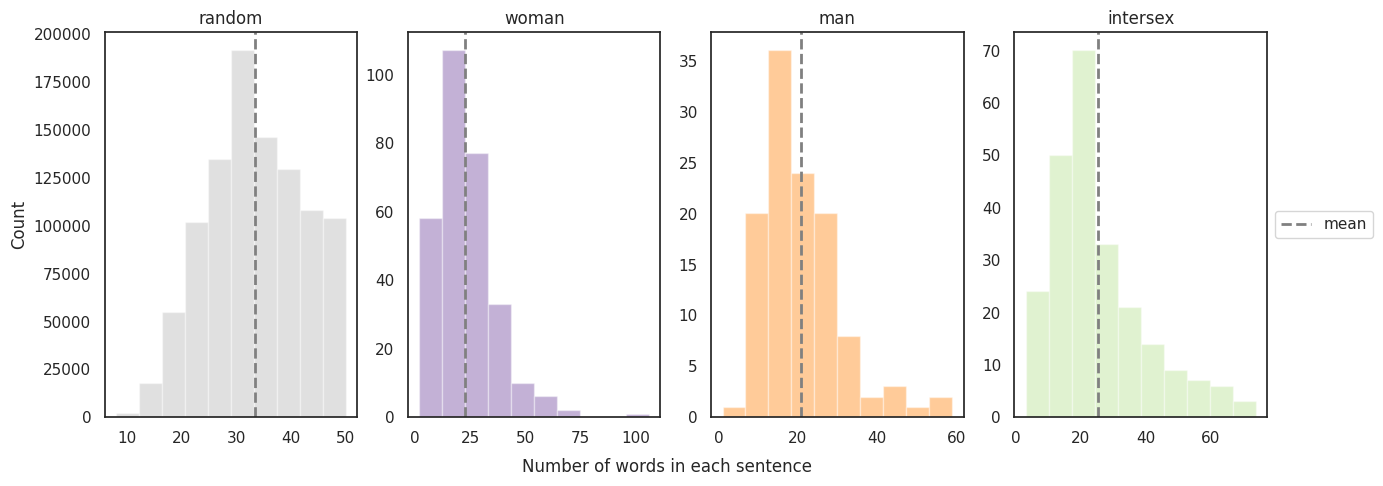

In [47]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.set_style("white")
#plt.legend(labels=['random', 'woman', 'man', 'intersex'])

subplot(1,4,1)
ax = sns.distplot(df_random['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Set2")[-1])
ax.axvline(x=df_random['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('random')
ax.set(ylabel='Count')
ax.set(xlabel=' ')

subplot(1,4,2)
ax = sns.distplot(df_woman['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Paired")[9])
ax.axvline(x=df_woman['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('woman')
ax.set(xlabel=' ')

subplot(1,4,3)
ax = sns.distplot(df_man['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[7])
ax.axvline(x=df_man['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('man')
ax.set(xlabel=' ')

subplot(1,4,4)
ax = sns.distplot(df_intersex['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[2])
ax.axvline(x=df_intersex['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('intersex')
ax.legend(labels=['mean'], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel=' ')

fig=ax.figure
fig.text(0.5,0.01, "Number of words in each sentence", ha="center", va="center")
plt.show()

In [50]:
tokens_random = []
for i in list(df_random['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_random['Sentences'][i]))
    tokens_random.append(numb_tokens)

tokens_woman = []
for i in list(df_woman['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_woman['Sentences'][i]))
    tokens_woman.append(numb_tokens)

tokens_man = []
for i in list(df_man['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_man['Sentences'][i]))
    tokens_man.append(numb_tokens)

tokens_intersex = []
for i in list(df_intersex['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_intersex['Sentences'][i]))
    tokens_intersex.append(numb_tokens)

In [54]:
list_dataset = ['random', 'woman', 'man', 'intersex']
list_mean_words = [round(np.mean(df_random['words in sentences']),1), round(np.mean(df_woman['words in sentences']),1), round(np.mean(df_man['words in sentences']),1), round(np.mean(df_intersex['words in sentences']),1)]
list_mean_tokens = [round(np.mean(tokens_random),1), round(np.mean(tokens_woman),1), round(np.mean(tokens_man),1), round(np.mean(tokens_intersex),1)]
list_sentences = [len(df_random), len(df_woman), len(df_man), len(df_intersex)]

In [55]:
wiki_stats = pd.DataFrame({'Twitter data': list_dataset, 
                            'Avg. number of words per sentence': list_mean_words,
                            'Avg. number of tokens per sentence': list_mean_tokens,
                            'Number of sentences': list_sentences})
wiki_stats

,Twitter data,Avg. number of words per sentence,Avg. number of tokens per sentence,Number of sentences
0,random,33.4,40.0,989944
1,woman,22.9,30.6,294
2,man,20.9,29.5,117
3,intersex,25.2,35.6,237
